In [1]:
# Reference:
# /exp/rhuang/icefall_align2/egs/librispeech/ASR/ruizhe_hmm/run.ipynb
# /exp/rhuang/icefall_align2/icefall/bpe_graph_compiler.py

In [1]:
import sys
sys.path.insert(0,'/exp/rhuang/meta/icefall/egs/librispeech/ASR/conformer_ctc2_noseg')
sys.path.insert(0,'/exp/rhuang/meta/k2/k2/python')
sys.path.insert(0,'/exp/rhuang/meta/k2/temp.linux-x86_64-cpython-310/lib')
sys.path.insert(0,'/exp/rhuang/meta/icefall')

In [2]:
import k2
import sentencepiece as spm
import torch
import pywrapfst as openfst

In [3]:
sp = spm.SentencePieceProcessor()
sp.load("/exp/rhuang/meta/icefall/egs/librispeech/ASR/data/lang_bpe_500/bpe.model")

True

In [4]:
texts = ["I DO NOT WANT TO INCUR", "THERE WAS LOVERS LIKE DOGS", "RED APP I"]
word_ids_list = sp.encode(texts, out_type=int)
word_ids_list

[[19, 100, 69, 414, 10, 15, 18, 79],
 [153, 33, 370, 23, 3, 231, 100, 52, 3],
 [49, 12, 5, 145, 19]]

In [9]:
word_ids_list = [[24, 102, 70, 393, 12, 17, 19, 80], [154, 37, 345, 21, 3, 225, 102, 52, 3]]
word_ids_list = [[24, 102, 70, 393, 12, 12, 17, 19, 80], [154, 37, 345, 21, 3, 225, 102, 52, 3]]
word_ids_list = [[24, 102, 70]]
word_ids_list = [[49, 11, 7, 161, 24]]
# word_ids_list = [[414, 3, 10], [4, 23, 174, 24], [49, 12, 5, 145, 19]]

In [10]:
graphs = k2.ctc_graph(word_ids_list, modified=False, device='cpu')

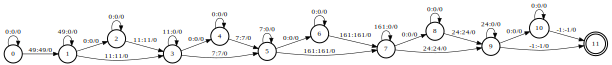

In [11]:
k2.to_dot(graphs[0])

In [12]:
graph = graphs[0]
c_str = k2.to_str_simple(graph)

In [13]:
arcs = c_str.strip().split("\n")
arcs = [x.strip() for x in arcs if len(x.strip()) > 0]
final_state = int(arcs[-1])
arcs = arcs[:-1]
arcs = [tuple(map(int, a.split())) for a in arcs]

In [14]:
arcs

[(0, 0, 0, 0, 0),
 (0, 1, 49, 49, 0),
 (1, 2, 0, 0, 0),
 (1, 1, 49, 0, 0),
 (1, 3, 11, 11, 0),
 (2, 2, 0, 0, 0),
 (2, 3, 11, 11, 0),
 (3, 4, 0, 0, 0),
 (3, 3, 11, 0, 0),
 (3, 5, 7, 7, 0),
 (4, 4, 0, 0, 0),
 (4, 5, 7, 7, 0),
 (5, 6, 0, 0, 0),
 (5, 5, 7, 0, 0),
 (5, 7, 161, 161, 0),
 (6, 6, 0, 0, 0),
 (6, 7, 161, 161, 0),
 (7, 8, 0, 0, 0),
 (7, 7, 161, 0, 0),
 (7, 9, 24, 24, 0),
 (8, 8, 0, 0, 0),
 (8, 9, 24, 24, 0),
 (9, 10, 0, 0, 0),
 (9, 9, 24, 0, 0),
 (9, 11, -1, -1, 0),
 (10, 10, 0, 0, 0),
 (10, 11, -1, -1, 0)]

In [42]:
from factor_transducer import make_factor_transducer1

In [43]:
from factor_transducer import make_factor_transducer2

In [44]:
from factor_transducer import make_factor_transducer3

In [45]:
from factor_transducer import WordCounter, make_factor_transducer4, make_factor_transducer4_skip

In [46]:
from factor_transducer import _make_factor_transducer5

In [ ]:
# import importlib
# importlib.reload(factor_transducer)

In [20]:
# [sp.id_to_piece(i) for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')]
word_start_symbols = [i for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')]

In [47]:
# graph_ft = make_factor_transducer1(word_ids_list[0])
# graph_ft = make_factor_transducer2(word_ids_list[0])
# graph_ft = make_factor_transducer3(word_ids_list[0], word_start_symbols=[i for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')])
# graph_ft = make_factor_transducer4(word_ids_list[0], word_start_symbols=[i for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')])
graph_ft = make_factor_transducer4_skip(word_ids_list[0], word_start_symbols=[i for i in range(sp.vocab_size()) if sp.id_to_piece(i).startswith('▁')])
# graph_ft = _make_factor_transducer5(graphs, word_start_symbols=word_start_symbols, two_ends_bonus=1.3)

In [48]:
graph_ft.arcs.values()

tensor([[  0,   0,   0,   0],
        [  0,   1,  49,   0],
        [  0,   5,   7,   0],
        [  0,   7, 161,   0],
        [  1,   2,   0,   0],
        [  1,   1,  49,   0],
        [  1,   3,  11,   0],
        [  2,   2,   0,   0],
        [  2,   3,  11,   0],
        [  3,   4,   0,   0],
        [  3,   3,  11,   0],
        [  3,   5,   7,   0],
        [  3,  11,  11,   0],
        [  4,   4,   0,   0],
        [  4,   5,   7,   0],
        [  5,   6,   0,   0],
        [  5,   5,   7,   0],
        [  5,   7, 161,   0],
        [  5,  11,   7,   0],
        [  6,   6,   0,   0],
        [  6,   7, 161,   0],
        [  7,   8,   0,   0],
        [  7,   7, 161,   0],
        [  7,   9,  24,   0],
        [  8,   8,   0,   0],
        [  8,   9,  24,   0],
        [  9,  10,   0,   0],
        [  9,   9,  24,   0],
        [  9,  11,  24,   0],
        [ 10,  10,   0,   0],
        [ 10,  11,   0,   0],
        [ 11,  11,   0,   0],
        [ 11,  12,  -1,   0]], dtype=tor

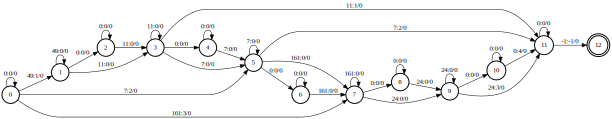

In [49]:
k2.to_dot(graph_ft)

In [21]:
graph_ft.labels

tensor([  0, 414,  10,   0,   0, 414,   3,   0,  10,   0,   0,   3,   0,   3,
         10,   0,  10,   0,   0,   0,   4,   0,   4,  23,   0,  23,   0,  23,
        174,   0, 174,   0, 174,  24,   0,  24,   0,  24,   0,   0,   0,   0,
         49,  -1,   0,  49,  12,   0,  12,   0,  12,   5,  -1,   0,   5,  -1,
          0,   5, 145,   0, 145,   0, 145,  19,  -1,   0,  19,  -1,   0,  19,
         -1,   0,  -1], dtype=torch.int32)

In [22]:
graph_ft.aux_labels

tensor([  0, 414,  10,   0,   0,   0,   3,   0,   0,   0,   0,   3,   0,   0,
         10,   0,  10,   0,   0,   0,   4,   0,   0,  23,   0,  23,   0,   0,
        174,   0, 174,   0,   0,  24,   0,  24,   0,   0,   0,   0,   0,   0,
         49,  -1,   0,   0,  12,   0,  12,   0,   0,   5,  -1,   0,   5,  -1,
          0,   0, 145,   0, 145,   0,   0,  19,  -1,   0,  19,  -1,   0,   0,
         -1,   0,  -1], dtype=torch.int32)

In [23]:
fst = k2.random_fsa(max_symbol=20, acyclic=True, min_num_arcs=10, max_num_arcs=100)
# fst = k2.random_fsa_vec()
fst.shape, fst.num_arcs

((3, None), 10)

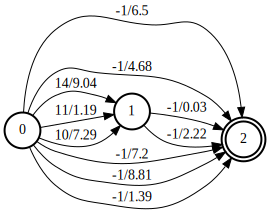

In [24]:
k2.to_dot(fst)

In [25]:
fst.labels

tensor([-1, -1, 14, 11, -1, -1, -1, 10, -1, -1], dtype=torch.int32)

In [26]:
aux_labels = torch.randint(0, 20, (fst.labels.size(0), 2))
# fst.aux_labels = aux_labels
# fst.aux_labels

In [27]:
# path = k2.random_paths(k2.create_fsa_vec([fst]), use_double_scores=True, num_paths=1)[0]
path = k2.shortest_path(k2.create_fsa_vec([fst]), use_double_scores=True)[0]
path.shape, path.num_arcs

((3, None), 2)

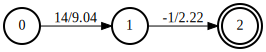

In [28]:
k2.to_dot(path)

In [29]:
path.labels

tensor([14, -1], dtype=torch.int32)

In [30]:
path.aux_labels

AttributeError: Unknown attribute aux_labels

In [ ]:
# https://github.com/k2-fsa/k2/blob/master/k2/python/k2/utils.py#L211
fst.arcs.values()

tensor([[         0,          1,         10, 1085381055],
        [         0,          1,         20, 1065068548],
        [         0,          2,         -1, 1088441199],
        [         0,          2,         -1, 1074503273],
        [         0,          2,         -1, 1066516792],
        [         0,          1,          8, 1087936754],
        [         0,          1,          6, 1091074952],
        [         0,          2,         -1, 1062343579],
        [         0,          1,         14, 1085201014],
        [         0,          1,         15, 1091121996],
        [         0,          1,         11, 1066508999],
        [         0,          2,         -1, 1065541966],
        [         1,          2,         -1, 1090141593],
        [         1,          2,         -1, 1071340503],
        [         1,          2,         -1, 1092094871],
        [         1,          2,         -1, 1075668090]], dtype=torch.int32)

In [ ]:
fst_dict = fst.as_dict()
fst_dict

{'arcs': tensor([[         0,          1,         10, 1085381055],
         [         0,          1,         20, 1065068548],
         [         0,          2,         -1, 1088441199],
         [         0,          2,         -1, 1074503273],
         [         0,          2,         -1, 1066516792],
         [         0,          1,          8, 1087936754],
         [         0,          1,          6, 1091074952],
         [         0,          2,         -1, 1062343579],
         [         0,          1,         14, 1085201014],
         [         0,          1,         15, 1091121996],
         [         0,          1,         11, 1066508999],
         [         0,          2,         -1, 1065541966],
         [         1,          2,         -1, 1090141593],
         [         1,          2,         -1, 1071340503],
         [         1,          2,         -1, 1092094871],
         [         1,          2,         -1, 1075668090]], dtype=torch.int32)}

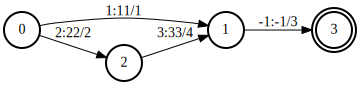

In [ ]:
s = '''
0 1 1 11 1
0 2 2 22 2
1 3 -1 -1 3
2 1 3 33 4
3
'''
fsa = k2.Fsa.from_str(s, acceptor=False)
k2.to_dot(fsa)

In [ ]:
from kaldifst.utils import k2_to_openfst

In [ ]:
k2_to_openfst(fsa)

In [ ]:
k2.to_str_simple(fsa, openfst=True)

'0 1 1 11 -1\n0 2 2 22 -2\n1 -3\n2 1 3 33 -4\n'

In [ ]:
dir(fst)

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_cache',
 '_get_arc_cdf',
 '_get_arc_post',
 '_get_backward_scores',
 '_get_dest_states',
 '_get_entering_arc_batches',
 '_get_entering_arcs',
 '_get_forward_scores',
 '_get_incoming_arcs',
 '_get_leaving_arc_batches',
 '_get_state_batches',
 '_get_tot_scores',
 '_invalidate_cache_',
 '_non_tensor_attr',
 '_properties',
 '_tensor_attr',
 'arcs',
 'arcs_as_tensor',
 'as_dict',
 'clone',
 'convert_attr_to_ragged_',
 'detach',
 'device',
 'draw',
 'from_dict',
 'from_fsas',
 'from_openfst',
 'from_str',
 'get_arc_post',
 'get_backward_scores',
 'get_filler',
 'get_forward_scores',
 'get_tot_s

## OpenFST python wrapper

https://www.openfst.org/twiki/bin/view/FST/PythonExtension


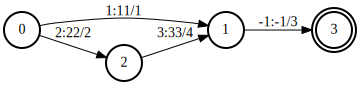

In [ ]:
import k2

s = '''
0 1 1 11 1
0 2 2 22 2
1 3 -1 -1 3
2 1 3 33 4
3
'''
fsa = k2.Fsa.from_str(s, acceptor=False)
k2.to_dot(fsa)

In [ ]:
k2.to_str_simple(fsa, openfst=True)

'0 1 1 11 -1\n0 2 2 22 -2\n1 -3\n2 1 3 33 -4\n'

In [ ]:
import pywrapfst as fst

# Create a simple FST
compiler1 = fst.Compiler()
compiler1.write(k2.to_str_simple(fsa, openfst=True))
f1 = compiler1.compile()

compiler2 = fst.Compiler()
compiler2.write(k2.to_str_simple(fsa, openfst=True))
f2 = compiler2.compile()

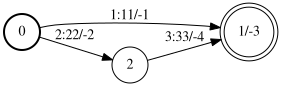

In [ ]:
f1

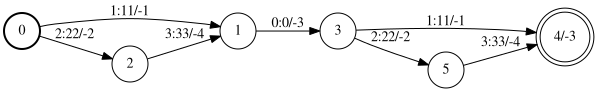

In [ ]:
f1.concat(f2)

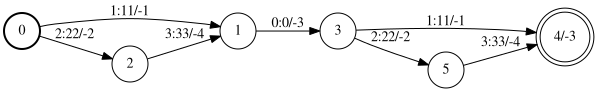

In [ ]:
f1

In [ ]:
help(fst.Fst.read_from_string)

Help on built-in function read_from_string:

read_from_string(...) method of builtins.type instance
    read_from_string(state)
    
    Reads an FST from a serialized string.
    
    Args:
      state: A string containing the serialized FST.
    
    Returns:
      An FST object.
    
    Raises:
      FstIOError: Read failed.



In [ ]:
str(f1)

'0\t1\t1\t11\t-1\n0\t2\t2\t22\t-2\n1\t3\t0\t0\t-3\n2\t1\t3\t33\t-4\n3\t4\t1\t11\t-1\n3\t5\t2\t22\t-2\n4\t-3\n5\t4\t3\t33\t-4\n'

In [ ]:
fsa_ = k2.Fsa.from_str(str(f1), acceptor=False, openfst=True)

In [ ]:
fsa_ = k2.Fsa.from_openfst(str(f1), acceptor=False)

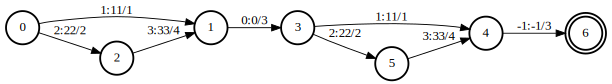

In [ ]:
k2.to_dot(fsa_)

In [ ]:
compiler1 = fst.Compiler()
compiler1.write(k2.to_str_simple(fsa, openfst=True))
f1 = compiler1.compile()

In [ ]:
compiler1.write(k2.to_str_simple(graph, openfst=True))
f2 = compiler1.compile()

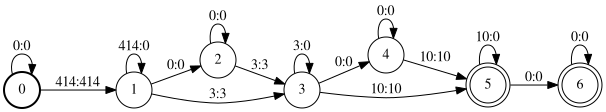

In [ ]:
f2